In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt


## Loading Data

### Rating and reviews

In [2]:
rr_cosmetic_01_20 = pd.read_csv("../data/Rating and Reviews/cosmetics_reviews_20200101-20200131.csv")
rr_skincare_12_19 = pd.read_csv("../data/Rating and Reviews/skincare_reviews_20191231.csv")
rr_skincare_11_19 = pd.read_csv("../data/Rating and Reviews/skincare_reviews_20191130.csv")

C:\Users\asaid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (27,28,29,32,33,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asaid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asaid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Product Catalogue

In [3]:
pc_cosmetic_01_20 = pd.read_csv("../data/Product Catalogue/Cosmetics_Product_20200116.csv")
pc_skincare_01_20 = pd.read_csv("../data/Product Catalogue/SkinCare_Product_20200116.csv")

C:\Users\asaid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Overview

In [4]:
rr_cosmetic_01_20.describe()

,Rating,Verified Buyer,Verified Reviewer,I shop at macys.com,Age
count,283871.000000,0.0,0.0,0.0,0.0
mean,4.099112,NaN,NaN,NaN,NaN
std,1.349078,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN
max,5.000000,NaN,NaN,NaN,NaN


In [5]:
rr_skincare_12_19.describe()

,Rating,I shop at macys.com
count,206660.000000,0.0
mean,4.274848,NaN
std,1.217490,NaN
min,1.000000,NaN
25%,4.000000,NaN
50%,5.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


## Difference between the two datasets

### Common columns

In [6]:
common_cols = set(rr_skincare_11_19.columns).intersection(set(rr_cosmetic_01_20.columns))
print("Common columns between the two datasets:")
for col in common_cols:
    print(col)

Common columns between the two datasets:
Verified Reviewer
Ingredient
Feature
Skin Tone
Product_ID
Sentiment
Source Product Identifier
Cons
Syndication Source
Geography
Benefit
Description
From
Additional Ingredients (no rulebase)
Title
Age
OnlineStatement_ID
Reviewer Skin Type
I shop at macys.com
Hair Color
Best For
Product Form
Rating
Purchase Location
Channel
Describe Yourself
Date
ELC Solution Type
Verified Buyer
Recommended
Eye Color
OnlinePost_ID
Pros
Make-up Style
Gender


### Different columns

In [7]:
common_cols = set(rr_skincare_11_19.columns).difference(set(rr_cosmetic_01_20.columns))
for col in common_cols:
    if col in rr_cosmetic_01_20:
        print('Column {:15} belongs to Cosmetic but not to Skincare'.format(col))
    else:
        print('Column {:15} belongs to Skincare but not to Cosmetic'.format(col))

Column Skin Condition  belongs to Skincare but not to Cosmetic
Column Use Case        belongs to Skincare but not to Cosmetic
Column Treatment Area  belongs to Skincare but not to Cosmetic
Column Packaging       belongs to Skincare but not to Cosmetic
Column Skin Type       belongs to Skincare but not to Cosmetic


## Merging the two datasets

In [8]:
rr_cosmetic_01_20['Dataset'] = 'Cosmetic'
rr_skincare_11_19['Dataset'] = 'Skincare'

In [9]:
df = pd.concat([rr_cosmetic_01_20, rr_skincare_11_19])

In [10]:
df.head()

,OnlinePost_ID,Source Product Identifier,OnlineStatement_ID,Date,Title,Description,Geography,Channel,Product_ID,Rating,Sentiment,Feature,Benefit,Ingredient,Additional Ingredients (no rulebase),Product Form,ELC Solution Type,Finish,Looks,Other,Trends,Syndication Source,Best For,Verified Buyer,From,Recommended,Verified Reviewer,Eye Color,Hair Color,Skin Tone,Gender,I shop at macys.com,Make-up Style,Purchase Location,Cons,Pros,Describe Yourself,Reviewer Skin Type,Age,Dataset,Skin Condition,Packaging,Skin Type,Treatment Area,Use Case
0,OnlinePost_20200304_835485c0-a5ef-4392-bf62-a5...,779364,OnlineStatement_20200304_835485c0-a5ef-4392-bf...,2020-01-22,Different blush,"This a is a great product, the liquid blush is...",UK,Superdrug,Product_20200109_5658707,4.0,Positive,Not Mentioned,Ease of Use,Not Mentioned,Not Mentioned,Cream;Liquid,Blush,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Original Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cosmetic,NaN,NaN,NaN,NaN,NaN
1,OnlinePost_20200304_835485c0-a5ef-4392-bf62-a5...,779364,OnlineStatement_20200304_835485c0-a5ef-4392-bf...,2020-01-22,Different blush,Different blush.,UK,Superdrug,Product_20200109_5658707,4.0,Neutral,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Cream;Liquid,Blush,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Original Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cosmetic,NaN,NaN,NaN,NaN,NaN
2,OnlinePost_20200304_835485c0-a5ef-4392-bf62-a5...,779364,OnlineStatement_20200304_835485c0-a5ef-4392-bf...,2020-01-22,Different blush,I would definitely recommend this product.,UK,Superdrug,Product_20200109_5658707,4.0,Positive,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Cream;Liquid,Blush,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Original Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cosmetic,NaN,NaN,NaN,NaN,NaN
3,OnlinePost_20200304_1de67b2f-5c04-4bb8-8280-1f...,753499,OnlineStatement_20200304_1de67b2f-5c04-4bb8-82...,2020-01-03,Elf Flawless foundation,Elf Flawless foundation.,UK,Superdrug,Product_20200109_5659353,5.0,Neutral,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Liquid,Foundation,Flawless,Not Mentioned,Not Mentioned,Not Mentioned,Original Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cosmetic,NaN,NaN,NaN,NaN,NaN
4,OnlinePost_20200304_835485c0-a5ef-4392-bf62-a5...,779364,OnlineStatement_20200304_835485c0-a5ef-4392-bf...,2020-01-22,Different blush,"I like the way you can layer the colour, keep ...",UK,Superdrug,Product_20200109_5658707,4.0,Neutral,Not Mentioned,Glowing & Brightening;High Intensity Color,Not Mentioned,Not Mentioned,Cream;Liquid,Blush,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Original Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cosmetic,NaN,NaN,NaN,NaN,NaN


In [40]:
df['Syndication Source'].unique()

array(['Original Source', 'MILANI COSMETICS', 'CHARLOTTE TILBURY',
       'SMASHBOX', 'NYX COSMETICS', 'BARE MINERALS', 'JANE IREDALE',
       'LAURA MERCIER', 'LANCOME', 'No Syndication Brand', 'NARS',
       'IT COSMETICS', "BURT'S BEES", 'URBAN DECAY', 'YVES SAINT LAURENT',
       'BUXOM COSMETICS', 'LAURA GELLER', 'COOLA', 'PERRICONE MD',
       'STRIVECTIN', 'GIORGIO ARMANI', 'GRANDE COSMETICS',
       'ELIZABETH ARDEN', 'MAC', 'SHISEIDO', "L'OREAL", 'FRESH',
       'CLARINS', 'COVERGIRL', 'ORIGINS', 'OFRA COSMETICS', 'JULEP',
       'ELEMIS', 'CLINIQUE', 'BLUEMERCURY', 'PHILOSOPHY',
       'FIRST AID BEAUTY', 'TARTE COSMETICS', 'HALEYS BEAUTY',
       'DERMABLEND', 'W3LL PEOPLE', 'CLE DE PEAU BEAUTE', "KIEHL'S",
       'LORAC COSMETICS', 'DR. DENNIS GROSS', 'ERNO LASZLO',
       'ESTEE LAUDER', 'SK-II', 'Philosophy', 'DERMALOGICA', 'StriVectin',
       'Garnier', 'SPACE NK', "MACY'S", 'GARNIER', 'NUFACE', 'Clinique',
       'PRODUCT SAMPLING COMMUNITY', "BLOOMINGDALE'S", 'Sulwhas

In [11]:
df.describe()

,Rating
count,1.159114e+07
mean,4.234895e+00
std,1.141873e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


## Geography

In [12]:
df.groupby(['Dataset', 'Geography']).size().unstack(0)

Dataset,Cosmetic,Skincare
Geography,,
UK,36287,1428715
USA,247584,9878556


Text(0, 0.5, 'Geography')

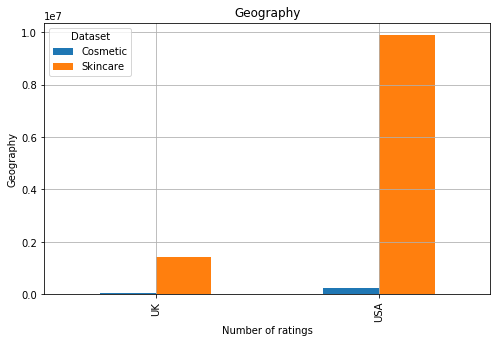

In [13]:
df.groupby(['Dataset', 'Geography']).size().unstack(0).plot.bar(figsize=[8,5])
plt.grid()
plt.title('Geography')
plt.xlabel('Number of ratings')
plt.ylabel('Geography')

In [14]:
df=df[df['Geography']=='USA']

## Dataset sizes

In [15]:
df.groupby('Dataset').size()

Dataset
Cosmetic     247584
Skincare    9878556
dtype: int64

Text(0.5, 0, 'Dataset')

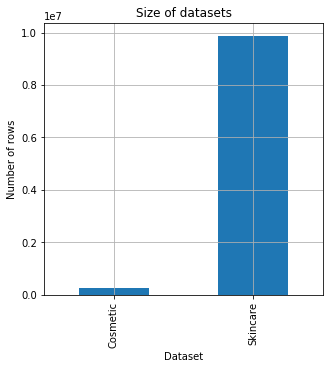

In [16]:
df.groupby('Dataset').size().plot.bar(figsize=[5,5])
plt.grid()
plt.title('Size of datasets')
plt.ylabel('Number of rows')
plt.xlabel('Dataset')

## Number of unique values

In [34]:
print('cos', len(rr_cosmetic_01_20.columns))
print('skin', len(rr_skincare_12_19.columns))

cos 40
skin 40


In [17]:
nb_unique = df.copy().groupby('Dataset').nunique().stack().unstack(0)
nb_unique

Dataset,Cosmetic,Skincare
OnlinePost_ID,63132,2397150
Source Product Identifier,10776,28576
OnlineStatement_ID,247584,9878556
Date,31,1826
Title,34522,854094
Description,196270,7221935
Geography,1,1
Channel,7,7
Product_ID,10776,28576
Rating,5,5


In [1]:
nb_unique.plot.bar()
plt.grid()
plt.xlabel('Column')
plt.ylabel('Number of unique values')

NameError: name 'plt' is not defined

## Missing Data

In [19]:
df_pct_na = (df.set_index('Dataset').isna().reset_index().groupby('Dataset').sum().divide(df.groupby('Dataset').size(), axis=0)*100).stack().unstack(0)
df_pct_na

Dataset,Cosmetic,Skincare
OnlinePost_ID,0.000000,0.000000
Source Product Identifier,0.000000,0.000000
OnlineStatement_ID,0.000000,0.000000
Date,0.000000,0.000000
Title,5.756026,0.350932
Description,0.000000,0.000000
Geography,0.000000,0.000000
Channel,0.000000,0.000000
Product_ID,0.000000,0.000000
Rating,0.000000,0.000000


In [20]:
len(pc_skincare_01_20.columns)

23

Text(0.5, 0, 'Column')

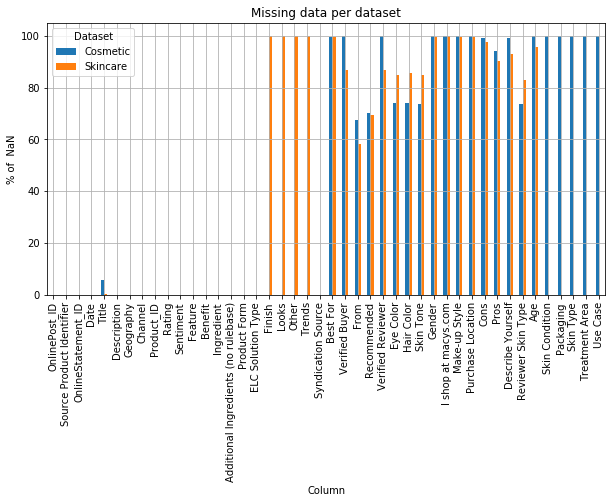

In [21]:
df_pct_na.plot.bar(figsize=[10,5])
plt.grid()
plt.title('Missing data per dataset')
plt.ylabel('% of  NaN')
plt.xlabel('Column')

## Ratings

Text(0, 0.5, 'Rating')

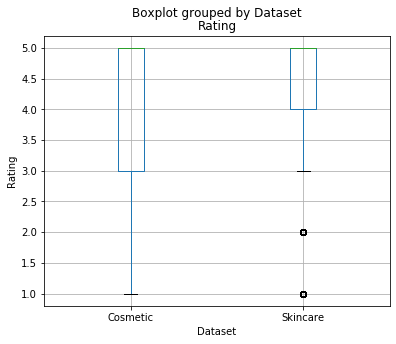

In [22]:
df[['Dataset', 'Rating']].boxplot(by='Dataset', figsize=[6,5])
plt.xlabel('Dataset')
plt.ylabel('Rating')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000276C381F608>,
      dtype=object)

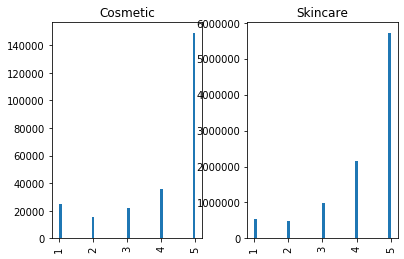

In [23]:
df.hist('Rating', by='Dataset', grid=True, bins=50)

### Rating by channel

In [24]:
df.groupby('Channel')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Amazon USA,1506025.0,4.125791,1.388725,1.0,4.0,5.0,5.0,5.0
Birchbox,4073898.0,4.136793,1.031476,1.0,4.0,4.0,5.0,5.0
Bloomingdales,224906.0,4.521716,0.951178,1.0,4.0,5.0,5.0,5.0
Macy's,580045.0,4.533715,0.972106,1.0,4.0,5.0,5.0,5.0
Nordstrom,113366.0,4.551964,0.974854,1.0,5.0,5.0,5.0,5.0
Sephora,2279557.0,4.230827,1.220818,1.0,4.0,5.0,5.0,5.0
Ulta,1348343.0,4.314109,1.157555,1.0,4.0,5.0,5.0,5.0


In [25]:
df['Rating'] = df['Rating'].astype(int)

In [26]:
ratings_channel = (df.groupby(['Channel','Rating'])['Rating'].count().divide(df.groupby('Channel')['Rating'].count())*100)

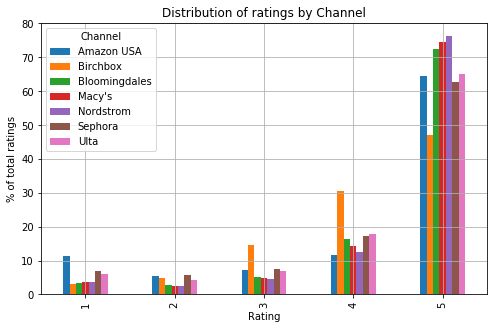

In [31]:
ratings_channel.unstack(0).plot.bar(figsize=[8,5])
plt.xlabel('Rating')
plt.ylabel('% of total ratings')
plt.title('Distribution of ratings by Channel')
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276C3CD8EC8>,
      dtype=object)

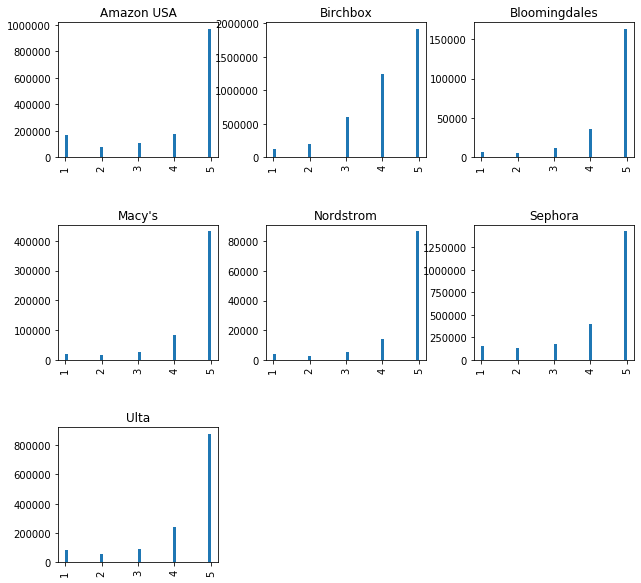

In [28]:
df.hist('Rating', by='Channel', grid=True, bins=50, figsize=[10,10])

Text(0, 0.5, 'Rating')

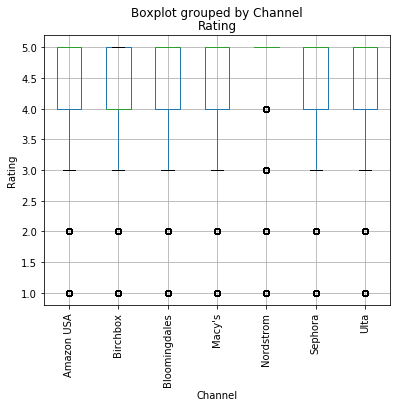

In [29]:
df[['Channel', 'Rating']].boxplot(by='Channel', figsize=[6,5], rot=90)
plt.xlabel('Channel')
plt.ylabel('Rating')

## Number of reviews by channel

Text(0.5, 1.0, 'Distribution of reviews by channel')

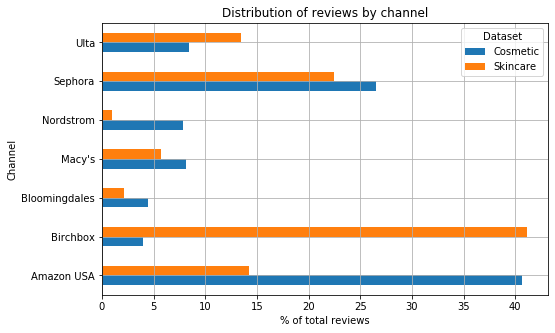

In [35]:
(df.groupby(['Dataset','Channel']).size().divide(df.groupby('Dataset').size(), axis=0)*100).unstack(0).plot.barh(figsize=[8,5])
plt.grid()
plt.xlabel('% of total reviews')
plt.title('Distribution of reviews by channel')